# Reference

- https://radimrehurek.com/gensim/auto_examples/howtos/run_compare_lda.html#sphx-glr-auto-examples-howtos-run-compare-lda-py

In [1]:
# sphinx_gallery_thumbnail_number = 2
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
## Download stopword if it's not available yet
# import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/enlik/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from string import punctuation
from nltk import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups

# Clean up the 20 Newsgroup dataset, will be used to fit LDA
newsgroups = fetch_20newsgroups()
eng_stopwords = set(stopwords.words('english'))

tokenizer = RegexpTokenizer(r'\s+', gaps=True)
stemmer = PorterStemmer()
translate_tab = {ord(p): u" " for p in punctuation}

def text2tokens(raw_text):
    """Split the raw_text string into a list of stemmed tokens."""
    clean_text = raw_text.lower().translate(translate_tab)
    tokens = [token.strip() for token in tokenizer.tokenize(clean_text)]
    tokens = [token for token in tokens if token not in eng_stopwords]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return [token for token in stemmed_tokens if len(token) > 2]  # skip short tokens

dataset = [text2tokens(txt) for txt in newsgroups['data']]  # convert a documents to list of tokens

In [8]:
from gensim.corpora import Dictionary
dictionary = Dictionary(documents=dataset, prune_at=None)
dictionary.filter_extremes(no_below=5, no_above=0.3, keep_n=None)  # use Dictionary to remove un-relevant tokens
dictionary.compactify()

d2b_dataset = [dictionary.doc2bow(doc) for doc in dataset]  # convert list of tokens to bag of word representation

2022-06-02 23:41:54,210 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-06-02 23:41:56,319 : INFO : adding document #10000 to Dictionary<95280 unique tokens: ['addit', 'anyon', 'bodi', 'bricklin', 'brought']...>
2022-06-02 23:41:56,608 : INFO : built Dictionary<105671 unique tokens: ['addit', 'anyon', 'bodi', 'bricklin', 'brought']...> from 11314 documents (total 1922370 corpus positions)
2022-06-02 23:41:56,632 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<105671 unique tokens: ['addit', 'anyon', 'bodi', 'bricklin', 'brought']...> from 11314 documents (total 1922370 corpus positions)", 'datetime': '2022-06-02T23:41:56.608855', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'created'}
2022-06-02 23:41:56,812 : INFO : discarding 87282 tokens: [('bricklin', 4), ('edu', 7393), ('host', 4848), ('know', 3533), ('lerxst', 2), ('line', 11282), ('nntp', 4777), (

In [9]:
from gensim.models import LdaMulticore
num_topics = 15

# fit cleaned dataset for two LDA models
lda_fst = LdaMulticore(
    corpus=d2b_dataset, num_topics=num_topics, id2word=dictionary,
    workers=4, eval_every=None, passes=10, batch=True,
)

lda_snd = LdaMulticore(
    corpus=d2b_dataset, num_topics=num_topics, id2word=dictionary,
    workers=4, eval_every=None, passes=20, batch=True,
)

2022-06-02 23:41:58,411 : INFO : using symmetric alpha at 0.06666666666666667
2022-06-02 23:41:58,420 : INFO : using symmetric eta at 0.06666666666666667
2022-06-02 23:41:58,426 : INFO : using serial LDA version on this node
2022-06-02 23:41:58,526 : INFO : running batch LDA training, 15 topics, 10 passes over the supplied corpus of 11314 documents, updating every 11314 documents, evaluating every ~0 documents, iterating 50x with a convergence threshold of 0.001000
2022-06-02 23:41:58,546 : INFO : training LDA model using 4 processes
2022-06-02 23:42:07,002 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/11314, outstanding queue size 1
2022-06-02 23:42:07,080 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/11314, outstanding queue size 2
2022-06-02 23:42:07,183 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/11314, outstanding queue size 3
2022-06-02 23:42:07,319 : INFO : PROGRESS: pass 0, dispatched chunk #3 = docume

2022-06-02 23:43:29,297 : INFO : PROGRESS: pass 4, dispatched chunk #3 = documents up to #8000/11314, outstanding queue size 4
2022-06-02 23:43:29,300 : INFO : PROGRESS: pass 4, dispatched chunk #4 = documents up to #10000/11314, outstanding queue size 5
2022-06-02 23:43:29,304 : INFO : PROGRESS: pass 4, dispatched chunk #5 = documents up to #11314/11314, outstanding queue size 6
2022-06-02 23:43:46,433 : INFO : topic #9 (0.067): 0.006*"scsi" + 0.005*"peopl" + 0.005*"state" + 0.004*"card" + 0.003*"bit" + 0.003*"make" + 0.003*"think" + 0.003*"control" + 0.003*"drive" + 0.003*"could"
2022-06-02 23:43:46,438 : INFO : topic #6 (0.067): 0.005*"gun" + 0.004*"think" + 0.004*"time" + 0.004*"make" + 0.003*"say" + 0.003*"peopl" + 0.003*"mani" + 0.003*"problem" + 0.003*"pitt" + 0.003*"news"
2022-06-02 23:43:46,447 : INFO : topic #11 (0.067): 0.010*"god" + 0.007*"peopl" + 0.007*"say" + 0.006*"christian" + 0.005*"think" + 0.005*"believ" + 0.004*"jesu" + 0.004*"time" + 0.004*"make" + 0.003*"thing"
2

2022-06-02 23:44:35,615 : INFO : topic #1 (0.067): 0.011*"game" + 0.007*"team" + 0.006*"play" + 0.006*"year" + 0.005*"win" + 0.005*"player" + 0.005*"run" + 0.004*"good" + 0.004*"season" + 0.004*"point"
2022-06-02 23:44:35,621 : INFO : topic #2 (0.067): 0.010*"key" + 0.008*"encrypt" + 0.007*"chip" + 0.006*"clipper" + 0.005*"secur" + 0.005*"govern" + 0.004*"wire" + 0.004*"system" + 0.004*"need" + 0.004*"law"
2022-06-02 23:44:35,628 : INFO : topic diff=0.512797, rho=0.261203
2022-06-02 23:44:35,636 : INFO : PROGRESS: pass 9, dispatched chunk #0 = documents up to #2000/11314, outstanding queue size 1
2022-06-02 23:44:35,785 : INFO : PROGRESS: pass 9, dispatched chunk #1 = documents up to #4000/11314, outstanding queue size 2
2022-06-02 23:44:35,789 : INFO : PROGRESS: pass 9, dispatched chunk #2 = documents up to #6000/11314, outstanding queue size 3
2022-06-02 23:44:35,791 : INFO : PROGRESS: pass 9, dispatched chunk #3 = documents up to #8000/11314, outstanding queue size 4
2022-06-02 23:4

2022-06-02 23:45:48,575 : INFO : topic #3 (0.067): 0.005*"think" + 0.003*"make" + 0.003*"game" + 0.003*"peopl" + 0.003*"way" + 0.003*"well" + 0.003*"thing" + 0.003*"good" + 0.002*"may" + 0.002*"right"
2022-06-02 23:45:48,578 : INFO : topic #12 (0.067): 0.005*"time" + 0.004*"file" + 0.004*"think" + 0.003*"program" + 0.003*"peopl" + 0.003*"entri" + 0.003*"problem" + 0.003*"right" + 0.003*"could" + 0.003*"output"
2022-06-02 23:45:48,581 : INFO : topic diff=0.598735, rho=0.339873
2022-06-02 23:45:48,584 : INFO : PROGRESS: pass 3, dispatched chunk #0 = documents up to #2000/11314, outstanding queue size 1
2022-06-02 23:45:48,695 : INFO : PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/11314, outstanding queue size 2
2022-06-02 23:45:48,698 : INFO : PROGRESS: pass 3, dispatched chunk #2 = documents up to #6000/11314, outstanding queue size 3
2022-06-02 23:45:48,700 : INFO : PROGRESS: pass 3, dispatched chunk #3 = documents up to #8000/11314, outstanding queue size 4
2022-06-02 

2022-06-02 23:47:14,881 : INFO : PROGRESS: pass 7, dispatched chunk #3 = documents up to #8000/11314, outstanding queue size 4
2022-06-02 23:47:14,887 : INFO : PROGRESS: pass 7, dispatched chunk #4 = documents up to #10000/11314, outstanding queue size 5
2022-06-02 23:47:14,891 : INFO : PROGRESS: pass 7, dispatched chunk #5 = documents up to #11314/11314, outstanding queue size 6
2022-06-02 23:47:39,076 : INFO : topic #14 (0.067): 0.004*"year" + 0.003*"new" + 0.003*"peopl" + 0.003*"stratu" + 0.003*"gun" + 0.003*"000" + 0.003*"time" + 0.003*"said" + 0.002*"day" + 0.002*"right"
2022-06-02 23:47:39,079 : INFO : topic #6 (0.067): 0.094*"max" + 0.025*"g9v" + 0.024*"b8f" + 0.022*"a86" + 0.021*"145" + 0.015*"1d9" + 0.013*"34u" + 0.011*"75u" + 0.011*"2di" + 0.010*"bhj"
2022-06-02 23:47:39,084 : INFO : topic #5 (0.067): 0.011*"peopl" + 0.009*"god" + 0.008*"say" + 0.006*"think" + 0.005*"christian" + 0.005*"right" + 0.004*"believ" + 0.004*"said" + 0.004*"thing" + 0.004*"time"
2022-06-02 23:47:39,

2022-06-02 23:48:53,027 : INFO : topic #9 (0.067): 0.004*"play" + 0.004*"period" + 0.004*"jew" + 0.003*"isra" + 0.003*"indiana" + 0.003*"new" + 0.003*"key" + 0.003*"israel" + 0.003*"power" + 0.003*"say"
2022-06-02 23:48:53,029 : INFO : topic #13 (0.067): 0.006*"scienc" + 0.006*"utexa" + 0.006*"msg" + 0.005*"food" + 0.005*"think" + 0.005*"window" + 0.004*"make" + 0.003*"austin" + 0.003*"time" + 0.003*"uiuc"
2022-06-02 23:48:53,030 : INFO : topic #2 (0.067): 0.010*"game" + 0.009*"team" + 0.008*"year" + 0.006*"player" + 0.006*"play" + 0.005*"win" + 0.005*"think" + 0.004*"good" + 0.004*"hockey" + 0.004*"time"
2022-06-02 23:48:53,032 : INFO : topic diff=0.406671, rho=0.237981
2022-06-02 23:48:53,034 : INFO : PROGRESS: pass 12, dispatched chunk #0 = documents up to #2000/11314, outstanding queue size 1
2022-06-02 23:48:53,116 : INFO : PROGRESS: pass 12, dispatched chunk #1 = documents up to #4000/11314, outstanding queue size 2
2022-06-02 23:48:53,117 : INFO : PROGRESS: pass 12, dispatched c

2022-06-02 23:49:40,995 : INFO : PROGRESS: pass 16, dispatched chunk #1 = documents up to #4000/11314, outstanding queue size 2
2022-06-02 23:49:41,001 : INFO : PROGRESS: pass 16, dispatched chunk #2 = documents up to #6000/11314, outstanding queue size 3
2022-06-02 23:49:41,005 : INFO : PROGRESS: pass 16, dispatched chunk #3 = documents up to #8000/11314, outstanding queue size 4
2022-06-02 23:49:41,089 : INFO : PROGRESS: pass 16, dispatched chunk #4 = documents up to #10000/11314, outstanding queue size 5
2022-06-02 23:49:41,091 : INFO : PROGRESS: pass 16, dispatched chunk #5 = documents up to #11314/11314, outstanding queue size 6
2022-06-02 23:49:53,505 : INFO : topic #2 (0.067): 0.012*"game" + 0.009*"team" + 0.008*"year" + 0.007*"player" + 0.006*"play" + 0.006*"win" + 0.005*"think" + 0.004*"good" + 0.004*"hockey" + 0.004*"season"
2022-06-02 23:49:53,508 : INFO : topic #12 (0.067): 0.008*"entri" + 0.007*"file" + 0.007*"appl" + 0.007*"output" + 0.007*"program" + 0.005*"problem" + 0.

In [10]:
def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)


try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

In [11]:
print(LdaMulticore.diff.__doc__)

Calculate the difference in topic distributions between two models: `self` and `other`.

        Parameters
        ----------
        other : :class:`~gensim.models.ldamodel.LdaModel`
            The model which will be compared against the current object.
        distance : {'kullback_leibler', 'hellinger', 'jaccard', 'jensen_shannon'}
            The distance metric to calculate the difference with.
        num_words : int, optional
            The number of most relevant words used if `distance == 'jaccard'`. Also used for annotating topics.
        n_ann_terms : int, optional
            Max number of words in intersection/symmetric difference between topics. Used for annotation.
        diagonal : bool, optional
            Whether we need the difference between identical topics (the diagonal of the difference matrix).
        annotation : bool, optional
            Whether the intersection or difference of words between two topics should be returned.
        normed : bool, optio

# Case 1: How topics within ONE model correlate with each other.

Short description (interactive annotations only):

* ``+++ make, world, well`` - words from the intersection of topics = present in both topics;

* ``--- money, day, still`` - words from the symmetric difference of topics = present in one topic but not the other.




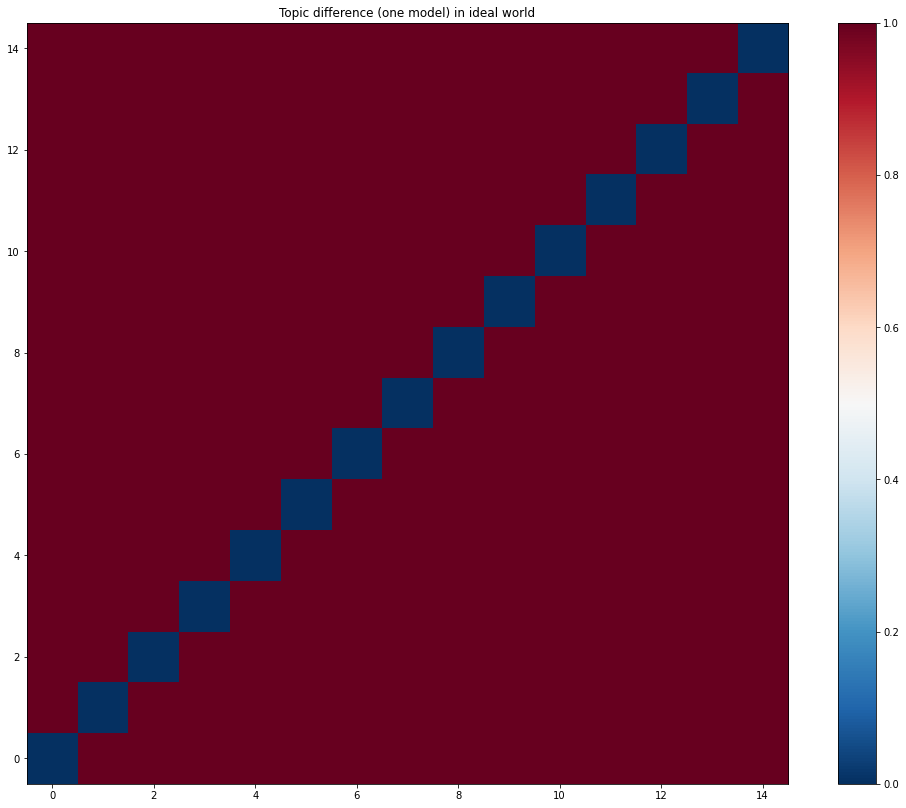

In [12]:
import numpy as np

mdiff = np.ones((num_topics, num_topics))
np.fill_diagonal(mdiff, 0.)
plot_difference(mdiff, title="Topic difference (one model) in ideal world")

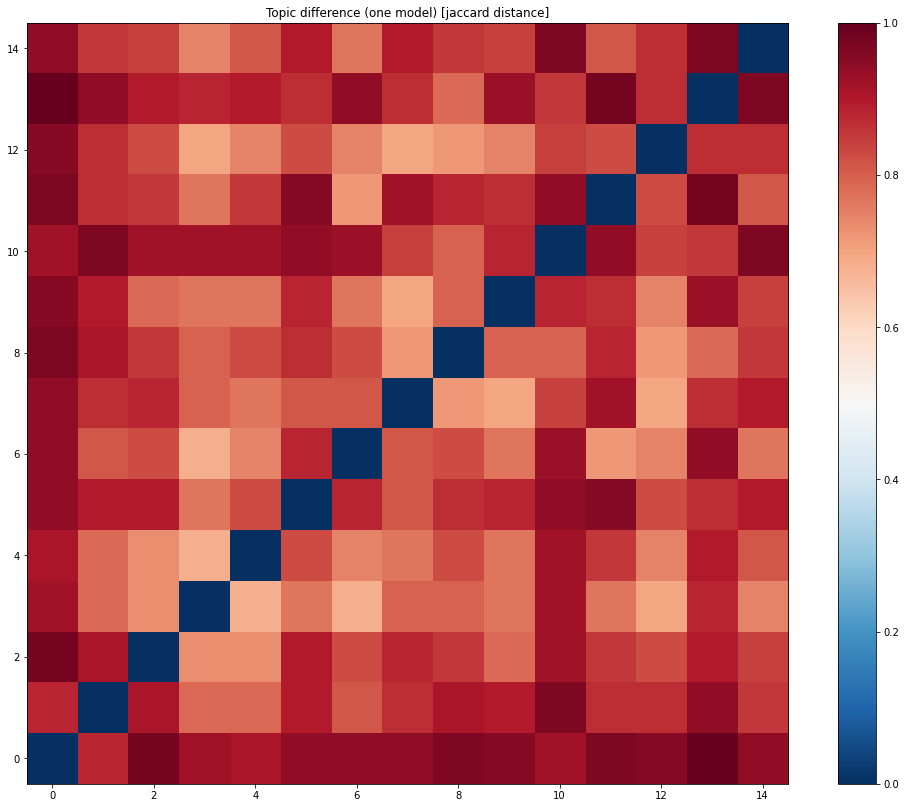

In [13]:
mdiff, annotation = lda_fst.diff(lda_fst, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

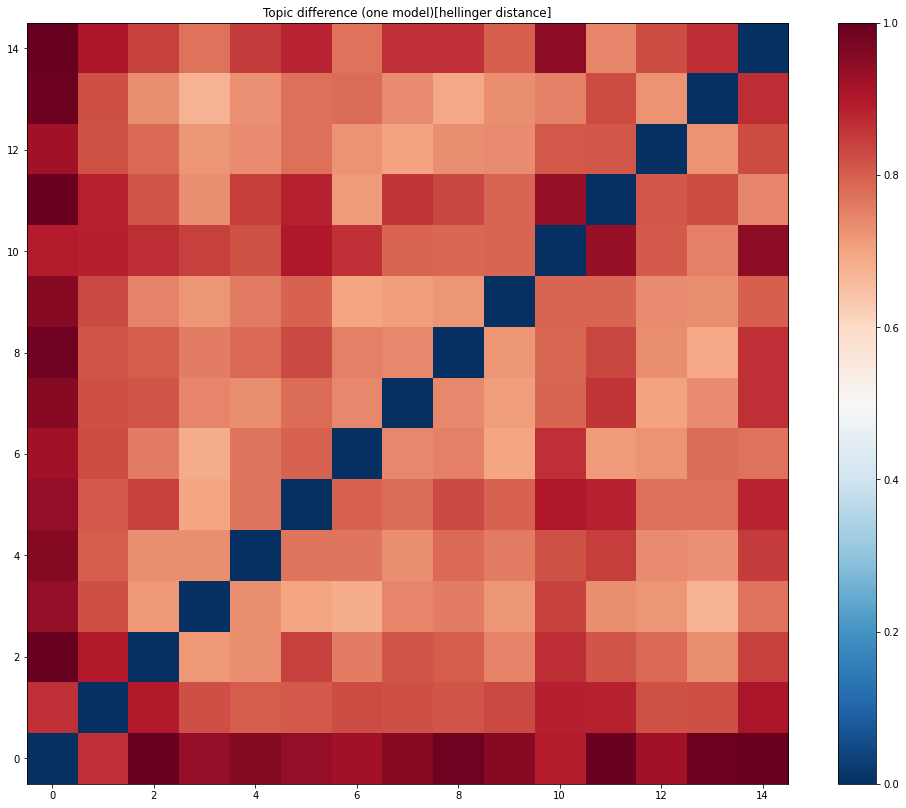

In [14]:
mdiff, annotation = lda_fst.diff(lda_fst, distance='hellinger', num_words=50)
plot_difference(mdiff, title="Topic difference (one model)[hellinger distance]", annotation=annotation)

## Case 2: How topics from DIFFERENT models correlate with each other.

- Sometimes, we want to look at the patterns between two different models and compare them.
- You can do this by constructing a matrix with the difference.
- Looking at this matrix, you can find similar and different topics between the two models. The plot also includes relevant tokens describing the topics' intersection and difference.



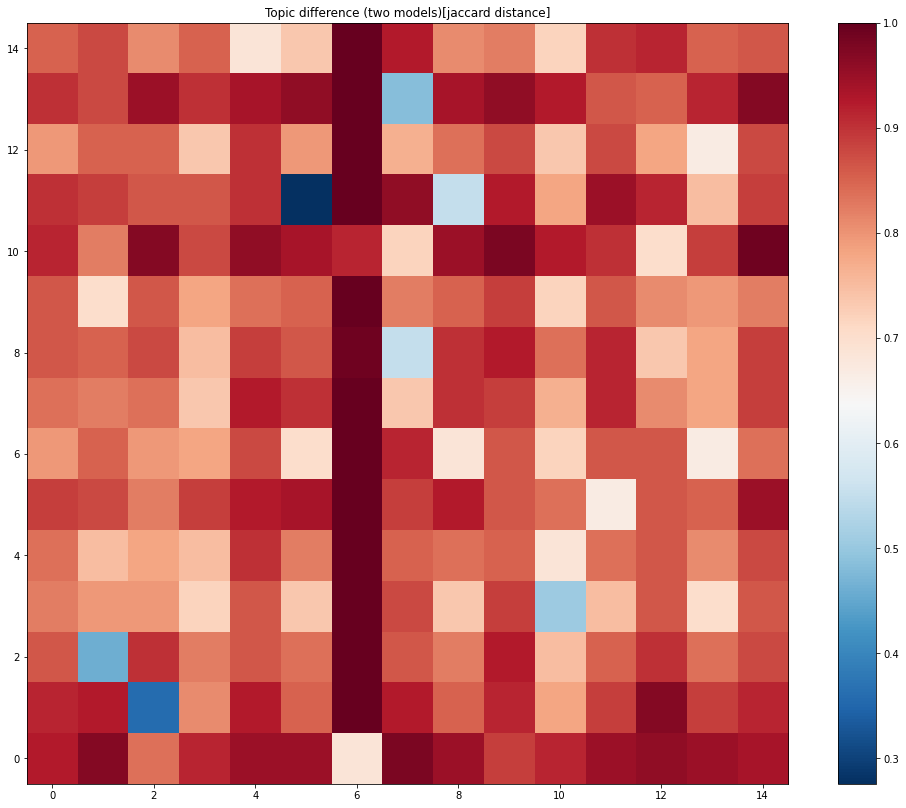

In [15]:
mdiff, annotation = lda_fst.diff(lda_snd, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)